In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('bmh')

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
df = pd.read_csv('AlteredColumns.csv.xls')
df.head()

PeriodStart  AirTemp  CloudOpacity  DewpointTemp  Ghi  \
0  2022-01-31T00:00:00Z      5.3           4.0           4.0    0   
1  2022-01-31T00:05:00Z      5.3           3.5           3.9    0   
2  2022-01-31T00:10:00Z      5.2           2.0           3.9    0   
3  2022-01-31T00:15:00Z      5.2           0.4           3.8    0   
4  2022-01-31T00:20:00Z      5.2           0.0           3.7    0   

   PrecipitableWater  RelativeHumidity  SurfacePressure  WindDirection10m  \
0               11.1              91.2            932.9                45   
1               11.2              91.1            933.0                45   
2               11.2              90.9            933.0                45   
3               11.2              90.8            933.0                45   
4               11.2              90.6            933.0                45   

   WindSpeed10m  
0           1.0  
1           1.0  
2           1.0  
3           1.0  
4           1.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114048 entries, 0 to 114047
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   PeriodStart        114048 non-null  object 
 1   AirTemp            114048 non-null  float64
 2   CloudOpacity       114048 non-null  float64
 3   DewpointTemp       114048 non-null  float64
 4   Ghi                114048 non-null  int64  
 5   PrecipitableWater  114048 non-null  float64
 6   RelativeHumidity   114048 non-null  float64
 7   SurfacePressure    114048 non-null  float64
 8   WindDirection10m   114048 non-null  int64  
 9   WindSpeed10m       114048 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 8.7+ MB


In [ ]:
df.isnull().sum()

PeriodStart          0
AirTemp              0
CloudOpacity         0
DewpointTemp         0
Ghi                  0
PrecipitableWater    0
RelativeHumidity     0
SurfacePressure      0
WindDirection10m     0
WindSpeed10m         0
dtype: int64

In [ ]:
from datetime import date
df["PeriodStart"]=df["PeriodStart"].astype(str)
df["PeriodStart"]=df["PeriodStart"].str.replace('T',' ')
df["PeriodStart"]=df["PeriodStart"].str.replace('Z','')
df.head()

PeriodStart  AirTemp  CloudOpacity  DewpointTemp  Ghi  \
0  2022-01-31 00:00:00      5.3           4.0           4.0    0   
1  2022-01-31 00:05:00      5.3           3.5           3.9    0   
2  2022-01-31 00:10:00      5.2           2.0           3.9    0   
3  2022-01-31 00:15:00      5.2           0.4           3.8    0   
4  2022-01-31 00:20:00      5.2           0.0           3.7    0   

   PrecipitableWater  RelativeHumidity  SurfacePressure  WindDirection10m  \
0               11.1              91.2            932.9                45   
1               11.2              91.1            933.0                45   
2               11.2              90.9            933.0                45   
3               11.2              90.8            933.0                45   
4               11.2              90.6            933.0                45   

   WindSpeed10m  
0           1.0  
1           1.0  
2           1.0  
3           1.0  
4           1.0

In [ ]:
df["PeriodStart"]=pd.to_datetime(df["PeriodStart"], format='%Y-%m-%d %H:%M:%S')
df.head()

PeriodStart  AirTemp  CloudOpacity  DewpointTemp  Ghi  \
0 2022-01-31 00:00:00      5.3           4.0           4.0    0   
1 2022-01-31 00:05:00      5.3           3.5           3.9    0   
2 2022-01-31 00:10:00      5.2           2.0           3.9    0   
3 2022-01-31 00:15:00      5.2           0.4           3.8    0   
4 2022-01-31 00:20:00      5.2           0.0           3.7    0   

   PrecipitableWater  RelativeHumidity  SurfacePressure  WindDirection10m  \
0               11.1              91.2            932.9                45   
1               11.2              91.1            933.0                45   
2               11.2              90.9            933.0                45   
3               11.2              90.8            933.0                45   
4               11.2              90.6            933.0                45   

   WindSpeed10m  
0           1.0  
1           1.0  
2           1.0  
3           1.0  
4           1.0

In [ ]:
df.describe(include='all').T

<ipython-input-10-0dd56a246831>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').T


count  unique        top freq      first  \
PeriodStart          114048  114048 2022-01-31    1 2022-01-31   
AirTemp            114048.0     NaN        NaT  NaN        NaT   
CloudOpacity       114048.0     NaN        NaT  NaN        NaT   
DewpointTemp       114048.0     NaN        NaT  NaN        NaT   
Ghi                114048.0     NaN        NaT  NaN        NaT   
PrecipitableWater  114048.0     NaN        NaT  NaN        NaT   
RelativeHumidity   114048.0     NaN        NaT  NaN        NaT   
SurfacePressure    114048.0     NaN        NaT  NaN        NaT   
WindDirection10m   114048.0     NaN        NaT  NaN        NaT   
WindSpeed10m       114048.0     NaN        NaT  NaN        NaT   

                                 last        mean         std    min    25%  \
PeriodStart       2023-03-02 23:55:00         NaN         NaN    NaN    NaN   
AirTemp                           NaT   19.366994    7.401434    1.3   13.4   
CloudOpacity                      NaT   23.715572    29.34276    0.0    0.0   
DewpointTemp                      NaT   13.630172    6.576686   -6.9    8.2   
Ghi                               NaT  184.909915  267.063509    0.0    0.0   
PrecipitableWater                 NaT   26.872135   17.854111    2.6   13.0   
RelativeHumidity                  NaT   72.655371   18.958076   19.2   59.5   
SurfacePressure                   NaT  934.309899    4.583998  922.4  930.6   
WindDirection10m                  NaT  129.203292  102.981379    0.0   36.0   
WindSpeed10m                      NaT    1.348313    0.666165    0.0    0.9   

                     50%    75%     max  
PeriodStart          NaN    NaN     NaN  
AirTemp             20.7   25.0    36.8  
CloudOpacity         9.5   43.7    97.0  
DewpointTemp        12.6   19.9    25.7  
Ghi                  0.0  342.0  1014.0  
PrecipitableWater   18.9   38.1    88.4  
RelativeHumidity    77.2   88.6   100.0  
SurfacePressure    934.5  937.9   946.2  
WindDirection10m    63.0  231.0   360.0  
WindSpeed10m         1.3    1.7     4.9

In [ ]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index([], dtype='object')
Numerical Variables:
['AirTemp', 'CloudOpacity', 'DewpointTemp', 'Ghi', 'PrecipitableWater', 'RelativeHumidity', 'SurfacePressure', 'WindDirection10m', 'WindSpeed10m']


count    114048.000000
mean         19.366994
std           7.401434
min           1.300000
25%          13.400000
50%          20.700000
75%          25.000000
max          36.800000
Name: AirTemp, dtype: float64


<ipython-input-15-1d46a958abdc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AirTemp'], color='g', bins=100, hist_kws={'alpha': 0.4});


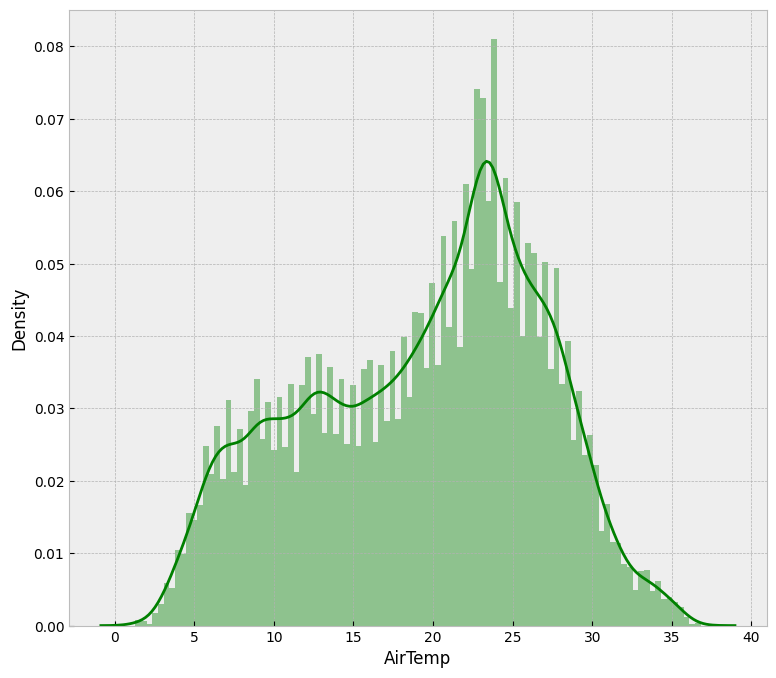

In [ ]:
print(df['AirTemp'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['AirTemp'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    114048.000000
mean         23.715572
std          29.342760
min           0.000000
25%           0.000000
50%           9.500000
75%          43.700000
max          97.000000
Name: CloudOpacity, dtype: float64


<ipython-input-24-20bf70f47bc3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CloudOpacity'], color='g', bins=100, hist_kws={'alpha': 0.4});


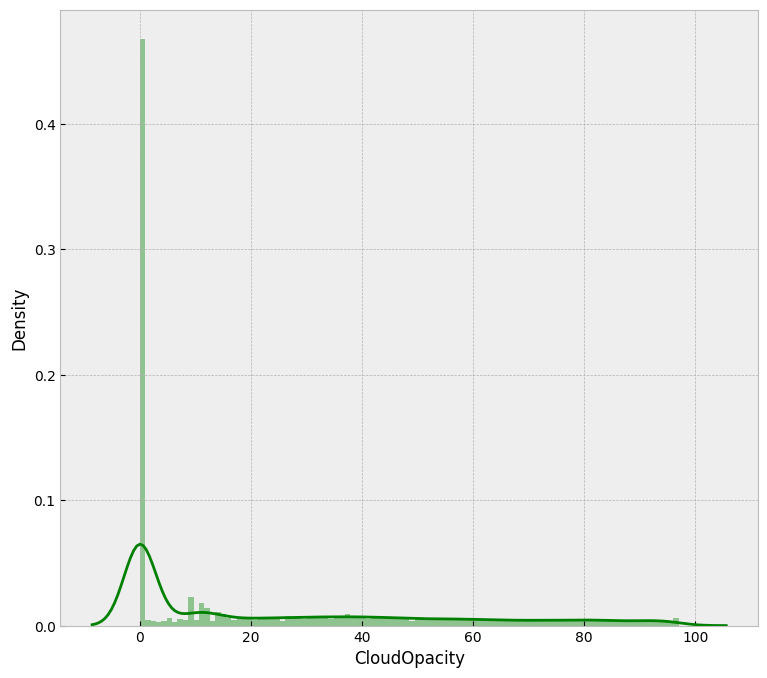

In [ ]:
print(df['CloudOpacity'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['CloudOpacity'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    114048.000000
mean         13.630172
std           6.576686
min          -6.900000
25%           8.200000
50%          12.600000
75%          19.900000
max          25.700000
Name: DewpointTemp, dtype: float64


<ipython-input-25-14d9979d1103>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DewpointTemp'], color='g', bins=100, hist_kws={'alpha': 0.4});


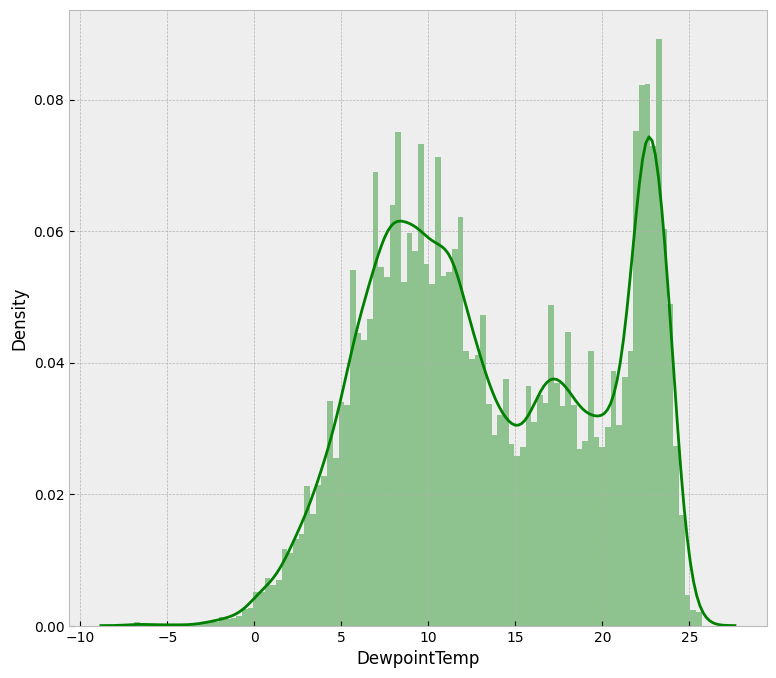

In [ ]:
print(df['DewpointTemp'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['DewpointTemp'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    114048.000000
mean         26.872135
std          17.854111
min           2.600000
25%          13.000000
50%          18.900000
75%          38.100000
max          88.400000
Name: PrecipitableWater, dtype: float64


<ipython-input-27-c67f582d2f16>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PrecipitableWater'], color='g', bins=100, hist_kws={'alpha': 0.4});


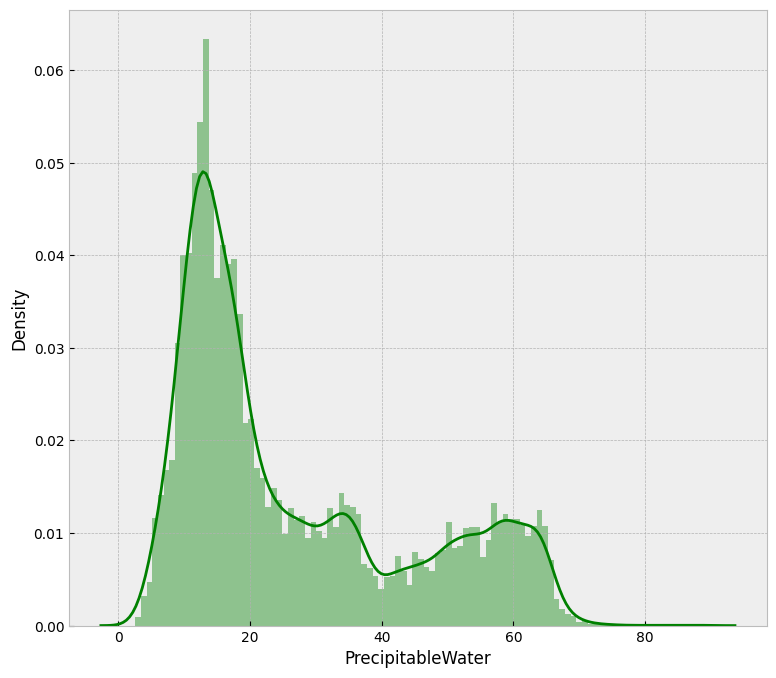

In [ ]:
print(df['PrecipitableWater'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['PrecipitableWater'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    114048.000000
mean        184.909915
std         267.063509
min           0.000000
25%           0.000000
50%           0.000000
75%         342.000000
max        1014.000000
Name: Ghi, dtype: float64


<ipython-input-28-e411cedbf74e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ghi'], color='g', bins=100, hist_kws={'alpha': 0.4});


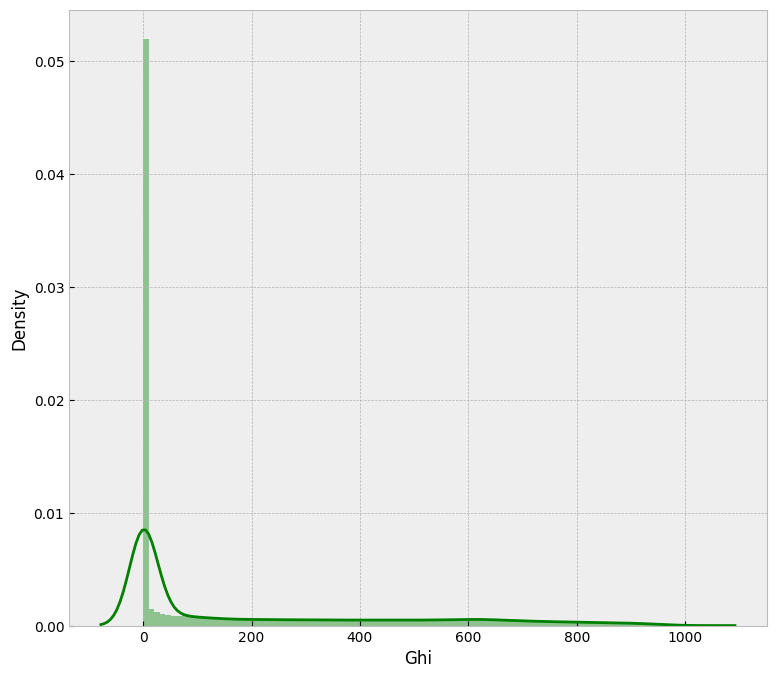

In [ ]:
print(df['Ghi'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Ghi'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    114048.000000
mean         72.655371
std          18.958076
min          19.200000
25%          59.500000
50%          77.200000
75%          88.600000
max         100.000000
Name: RelativeHumidity, dtype: float64


<ipython-input-29-a11756459a5f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['RelativeHumidity'], color='g', bins=100, hist_kws={'alpha': 0.4});


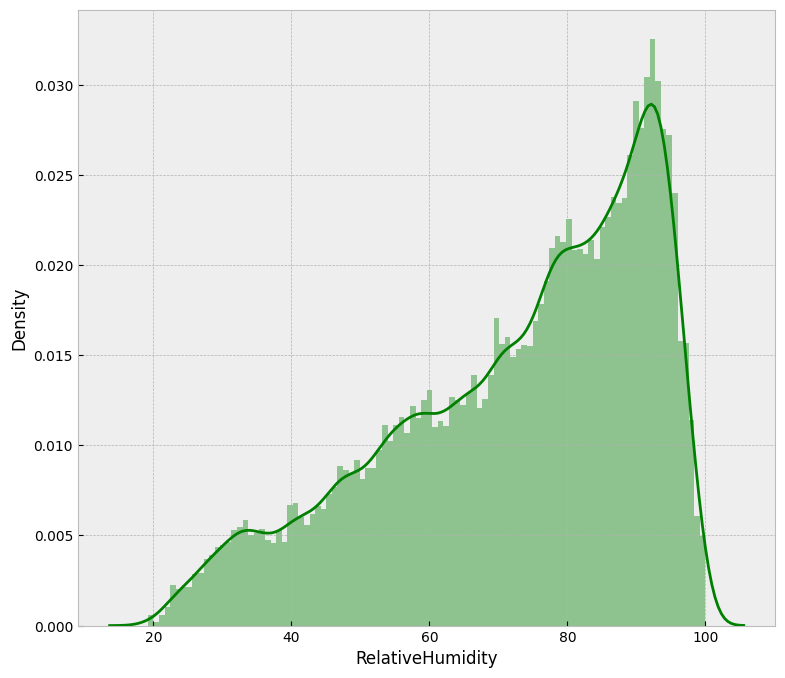

In [ ]:
print(df['RelativeHumidity'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['RelativeHumidity'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    114048.000000
mean        934.309899
std           4.583998
min         922.400000
25%         930.600000
50%         934.500000
75%         937.900000
max         946.200000
Name: SurfacePressure, dtype: float64


<ipython-input-30-fecd9a72be0d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SurfacePressure'], color='g', bins=100, hist_kws={'alpha': 0.4});


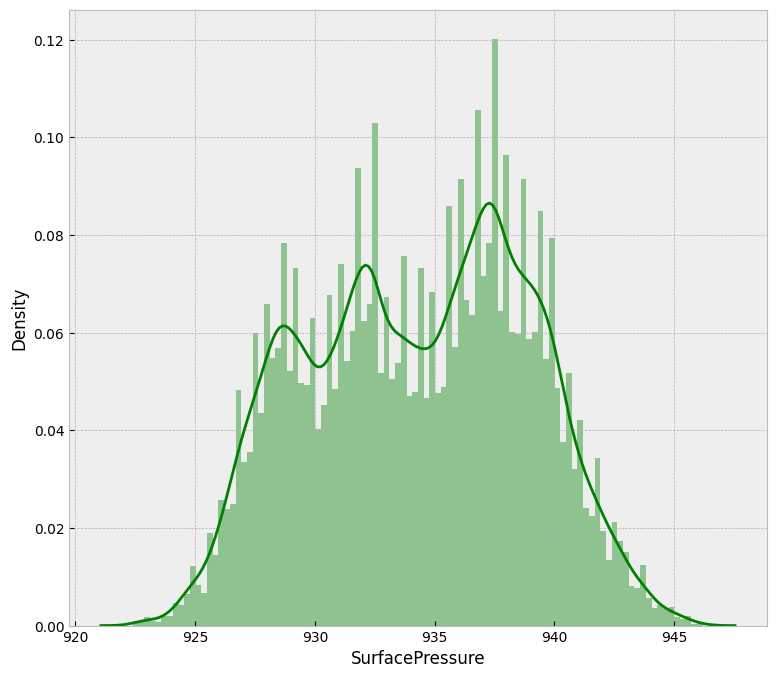

In [ ]:
print(df['SurfacePressure'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SurfacePressure'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    114048.000000
mean        129.203292
std         102.981379
min           0.000000
25%          36.000000
50%          63.000000
75%         231.000000
max         360.000000
Name: WindDirection10m, dtype: float64


<ipython-input-31-28dbe5c5c8bb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['WindDirection10m'], color='g', bins=100, hist_kws={'alpha': 0.4});


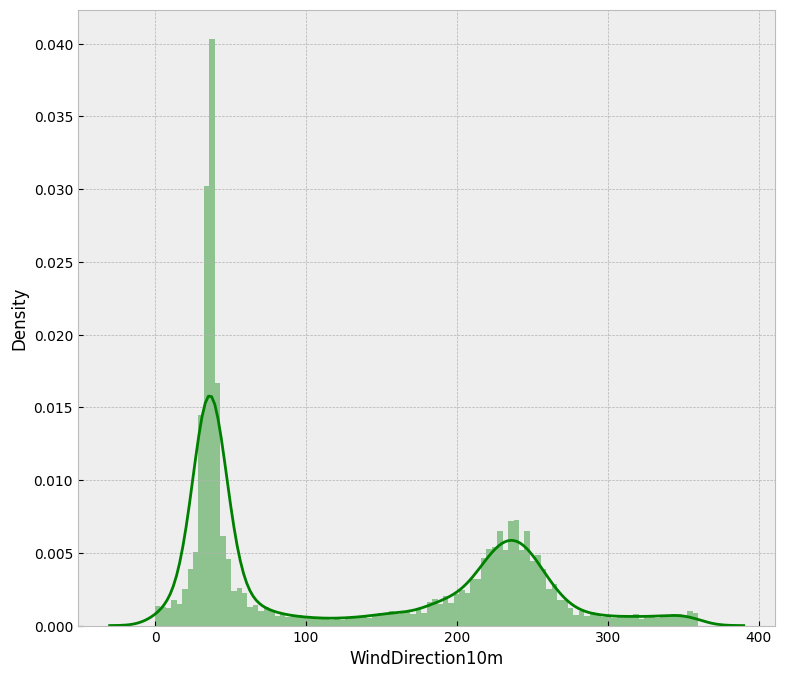

In [ ]:
print(df['WindDirection10m'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['WindDirection10m'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    114048.000000
mean          1.348313
std           0.666165
min           0.000000
25%           0.900000
50%           1.300000
75%           1.700000
max           4.900000
Name: WindSpeed10m, dtype: float64


<ipython-input-26-8e441f04e53d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['WindSpeed10m'], color='g', bins=100, hist_kws={'alpha': 0.4});


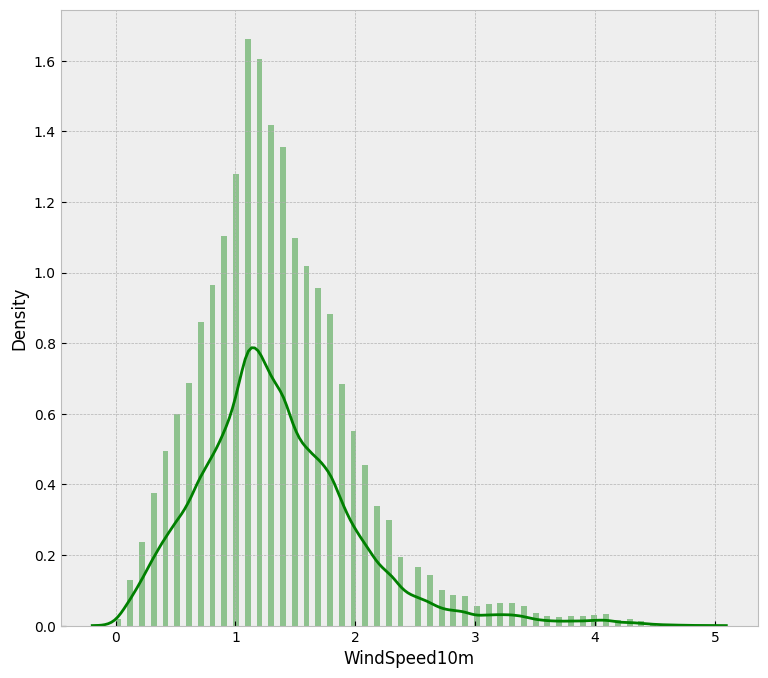

In [ ]:
print(df['WindSpeed10m'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['WindSpeed10m'], color='g', bins=100, hist_kws={'alpha': 0.4});

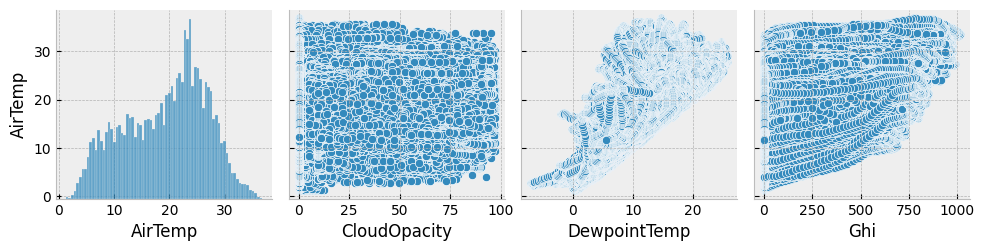

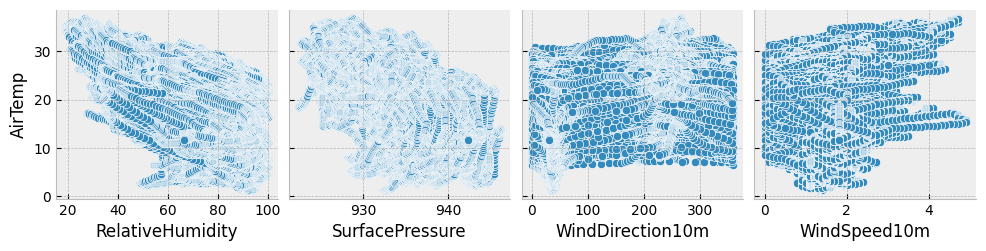

In [ ]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i+1:i+5],
                y_vars=['AirTemp'])

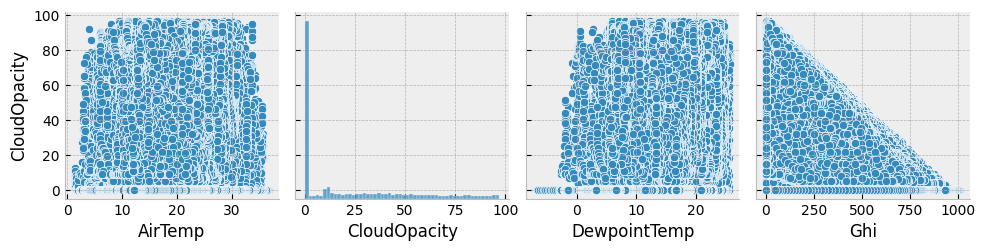

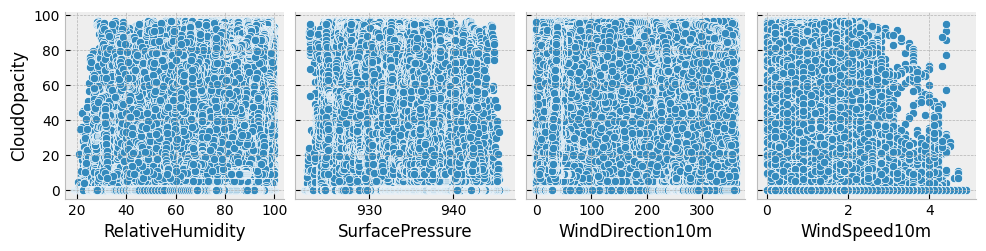

In [ ]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i+1:i+5],
                y_vars=['CloudOpacity'])

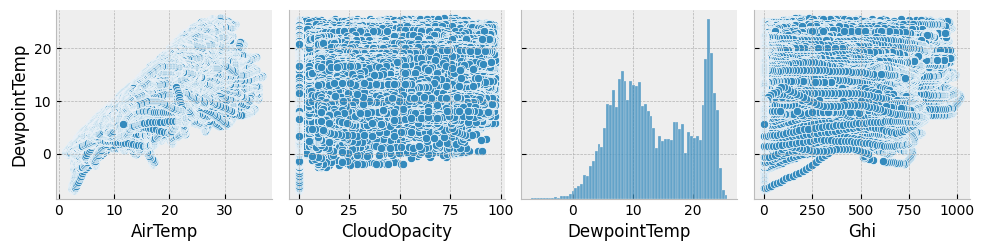

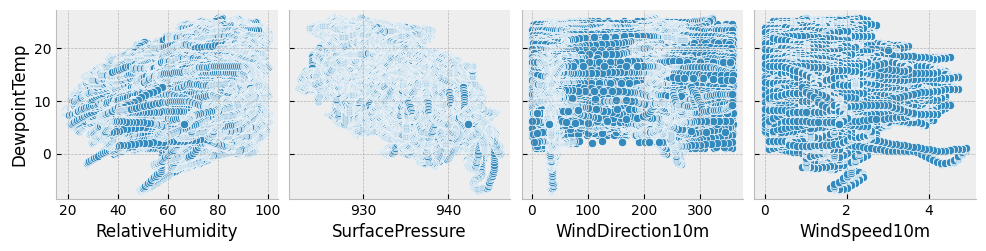

In [ ]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i+1:i+5],
                y_vars=['DewpointTemp'])

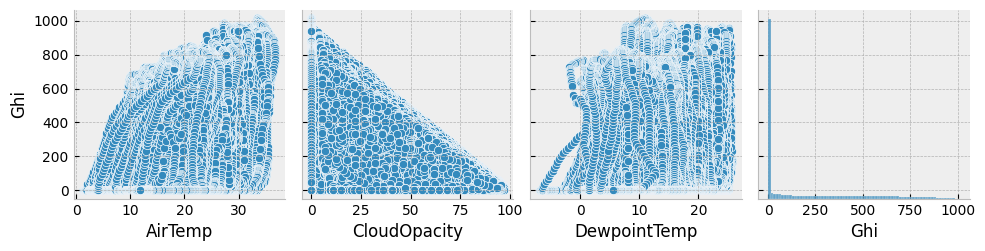

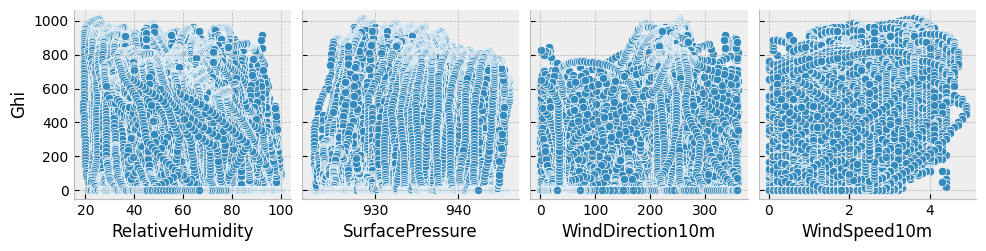

In [ ]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i+1:i+5],
                y_vars=['Ghi'])

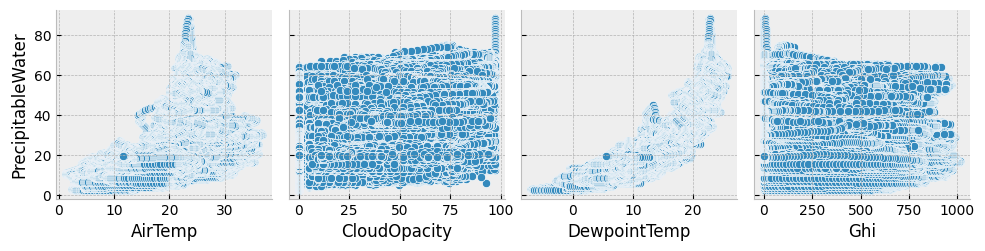

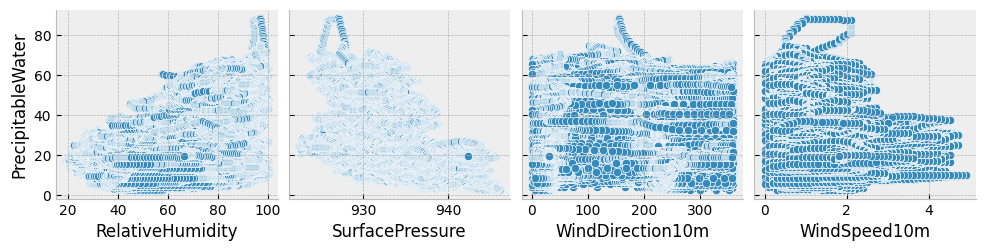

In [ ]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i+1:i+5],
                y_vars=['PrecipitableWater'])

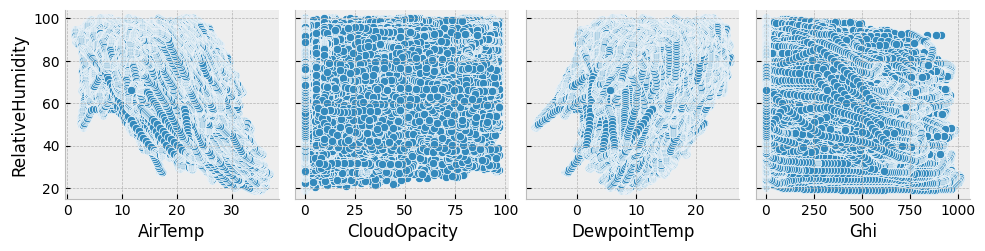

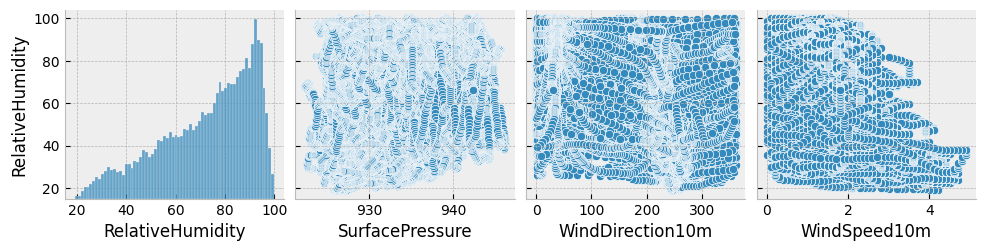

In [ ]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i+1:i+5],
                y_vars=['RelativeHumidity'])

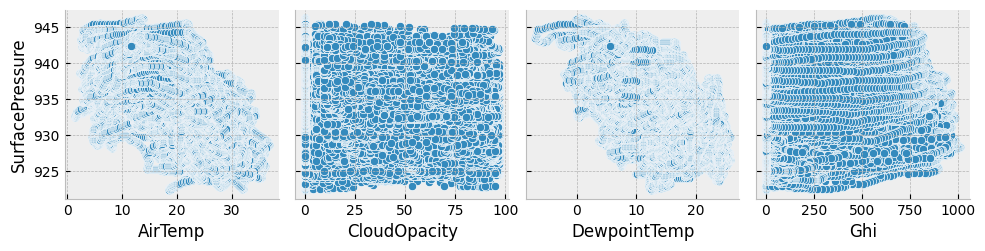

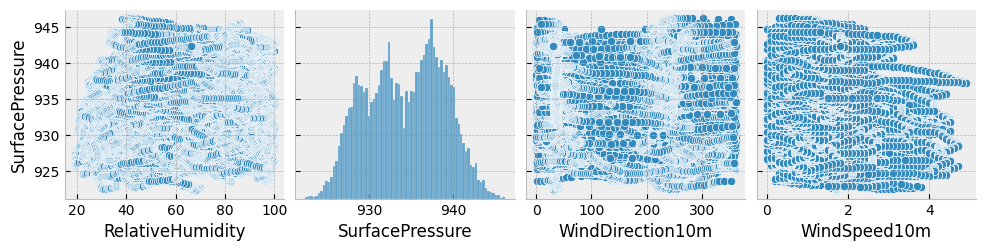

In [ ]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i+1:i+5],
                y_vars=['SurfacePressure'])

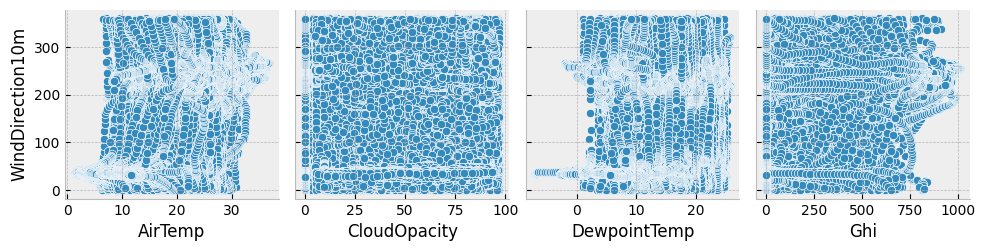

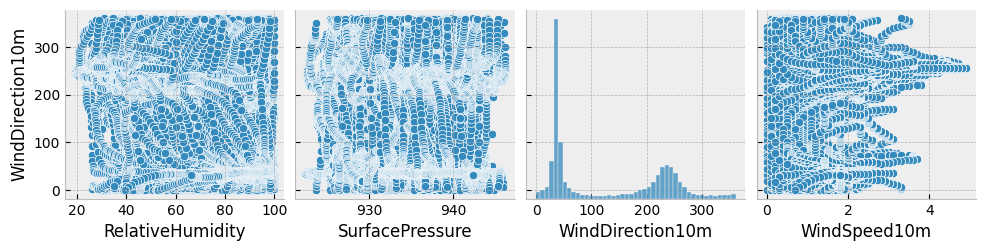

In [ ]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i+1:i+5],
                y_vars=['WindDirection10m'])

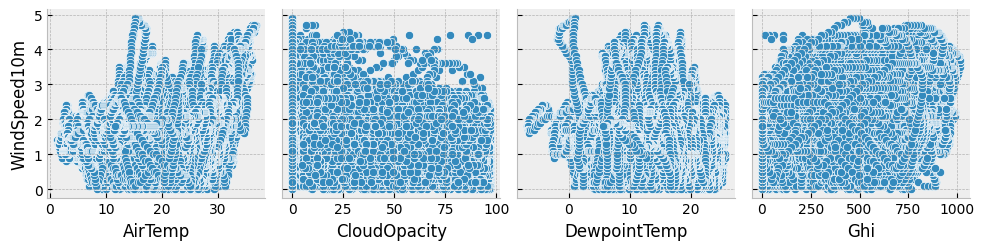

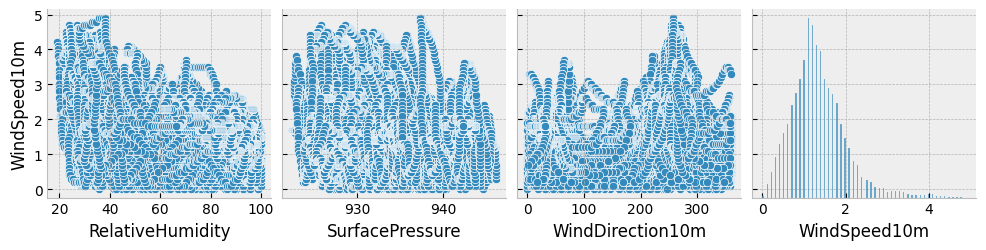

In [ ]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i+1:i+5],
                y_vars=['WindSpeed10m'])

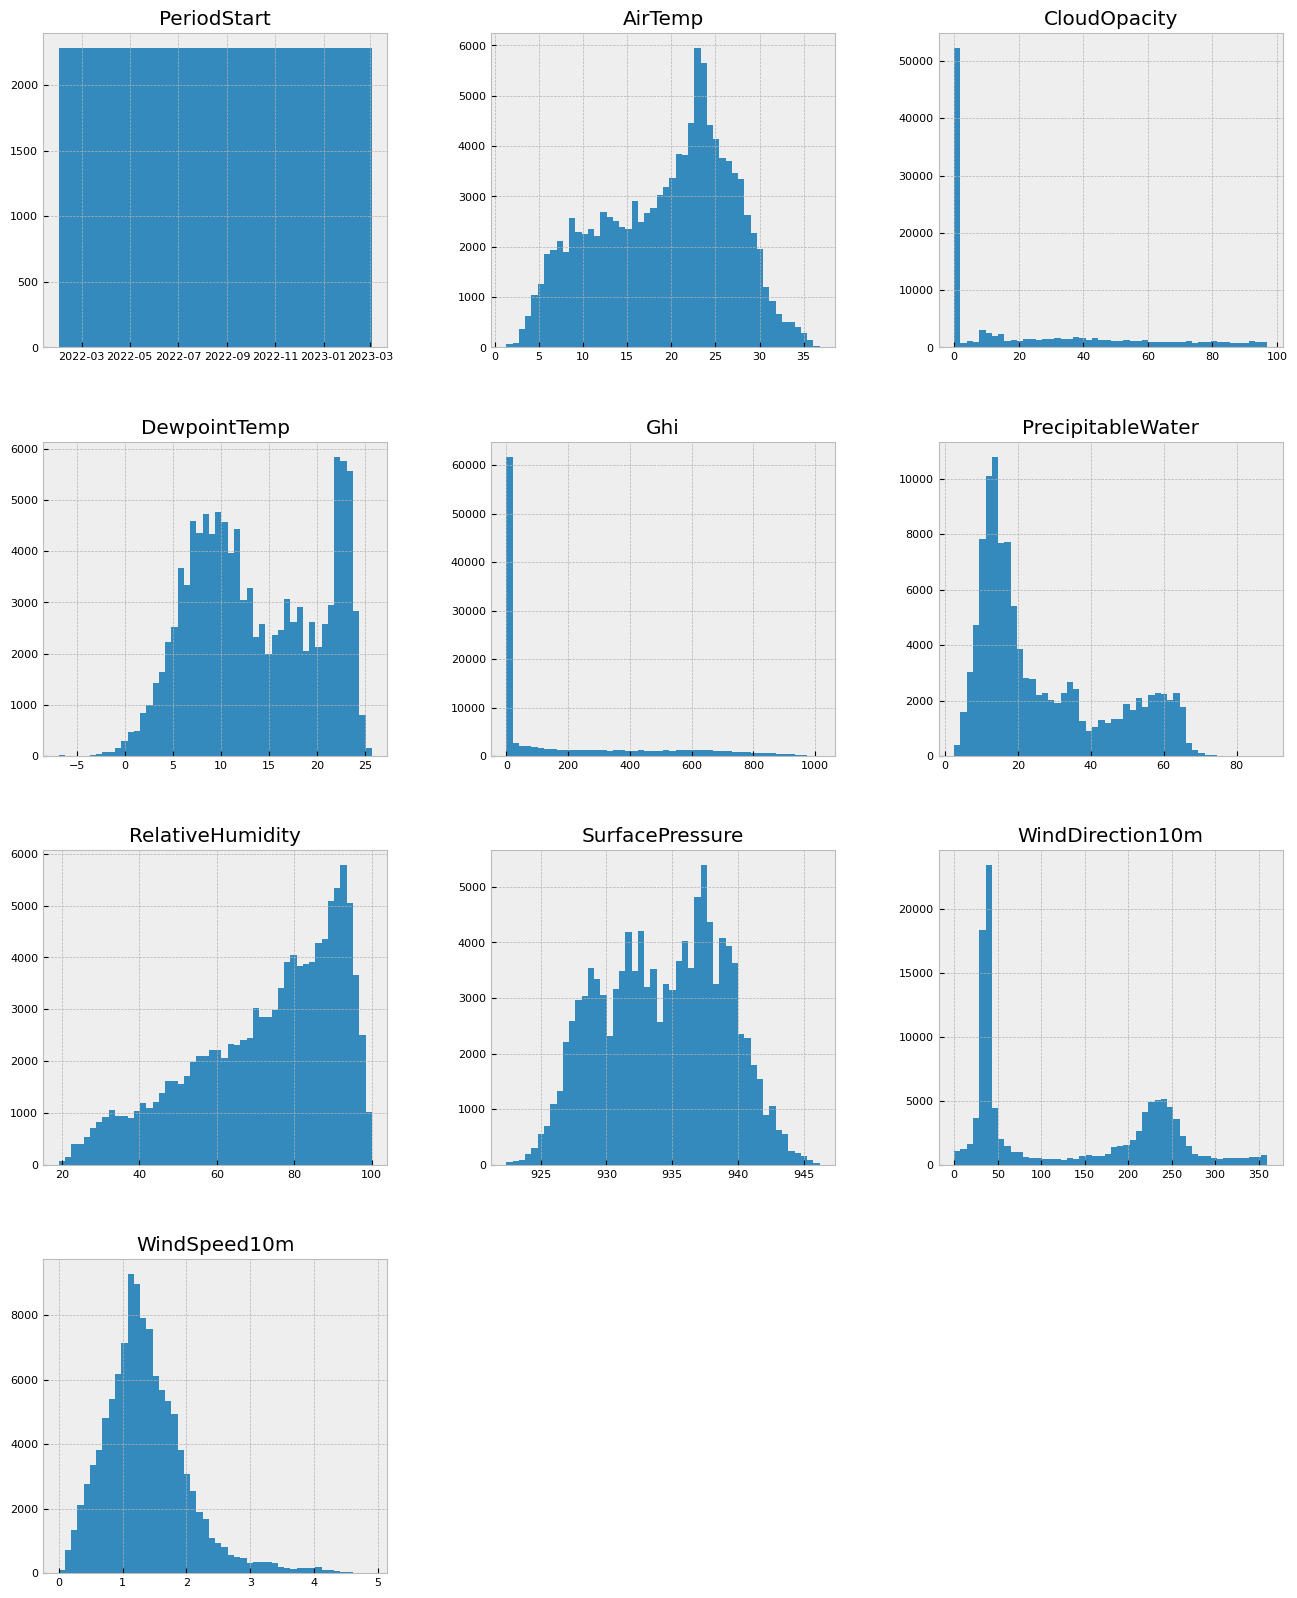

In [ ]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

In [ ]:
df_num_corr = df.corr()['AirTemp'][:-1]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with AirTemp:\n{}".format(len(golden_features_list), golden_features_list))

There is 5 strongly correlated values with AirTemp:
AirTemp              1.000000
DewpointTemp         0.743678
PrecipitableWater    0.593056
WindDirection10m     0.529856
SurfacePressure     -0.639439
Name: AirTemp, dtype: float64


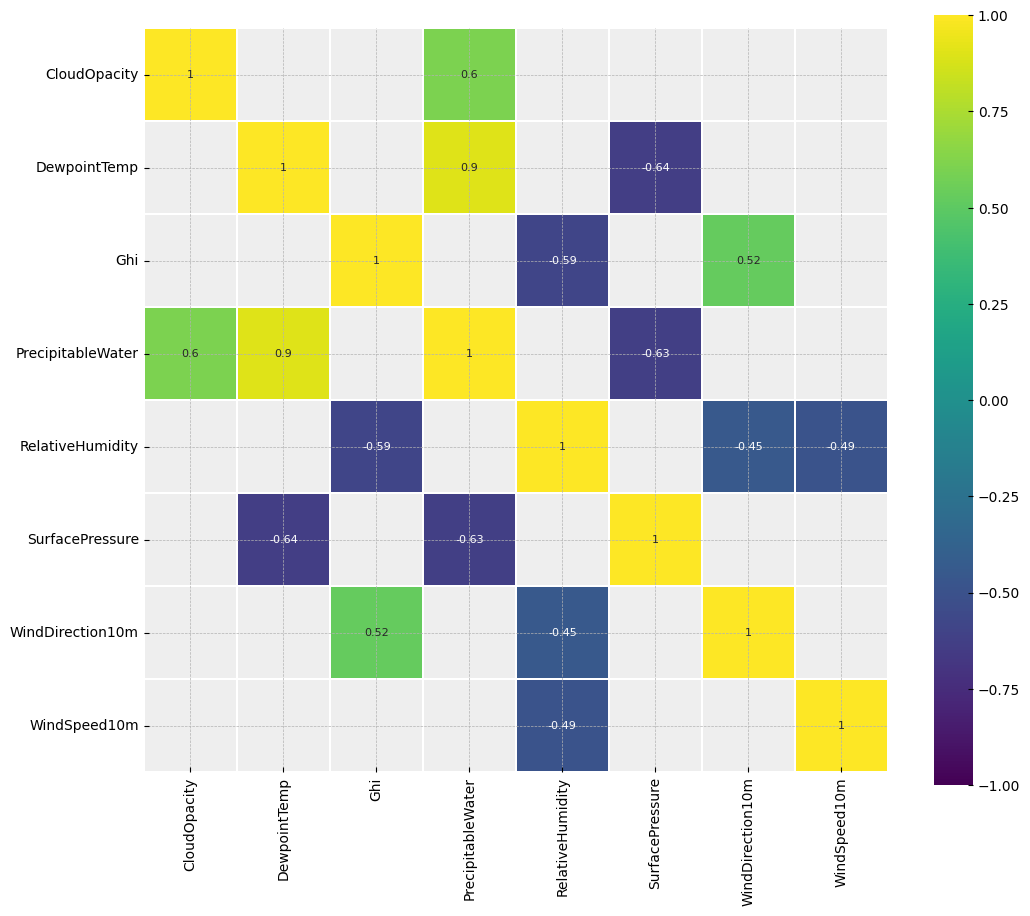

In [ ]:
corr = df.drop('AirTemp', axis=1).corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [ ]:
num_cols

['AirTemp',
 'CloudOpacity',
 'DewpointTemp',
 'Ghi',
 'PrecipitableWater',
 'RelativeHumidity',
 'SurfacePressure',
 'WindDirection10m',
 'WindSpeed10m']

In [ ]:
# Plot 